### 필요 라이브러리 설치

In [8]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.2/9.8 MB 137.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.8 MB 36.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.8 MB 19.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.8 MB 17.7 MB/s eta 0:00:01
   ------------------ --------------------- 4.6/9.8 MB 22.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.5/9.8 MB 30.0 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.8 MB 25.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.0/9.8 MB 23.3 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ---------------------------------------- 233.9/233.9 kB ? eta 0:00:00


### 필요 라이브러리 import

In [258]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

### 삼성전자 주가 가져오기

In [259]:
# https://velog.io/@choonsik_mom/ARIMA-SARIMA-auto-ARIMA%EB%A1%9C-%EC%82%BC%EC%A0%84-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0
# 김성범 교수님 arima 실습


df = fdr.DataReader('005930', '2014-07-01', '2024-07-26')
df.info()
# df.tail(50)
# df.plot()
# fig = df['Close'].plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2479 entries, 2014-07-01 to 2024-07-26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2479 non-null   int64  
 1   High    2479 non-null   int64  
 2   Low     2479 non-null   int64  
 3   Close   2479 non-null   int64  
 4   Volume  2479 non-null   int64  
 5   Change  2479 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 135.6 KB


In [454]:
# 기간 필터링
demands = df.loc[(df.index >= '2023-01-01') & (df.index <= '2024-02-14'), 'Close']
demands.info()
demands

test_demands = df.loc[(df.index >= '2024-02-15') & (df.index <= '2024-02-28'), 'Close']
test_demands.info()
test_demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 275 entries, 2023-01-02 to 2024-02-14
Series name: Close
Non-Null Count  Dtype
--------------  -----
275 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2024-02-15 to 2024-02-28
Series name: Close
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


Date
2024-02-15    73000
2024-02-16    72800
2024-02-19    73800
2024-02-20    73300
2024-02-21    73000
2024-02-22    73100
2024-02-23    72900
2024-02-26    72800
2024-02-27    72900
2024-02-28    73200
Name: Close, dtype: int64

### 정상성 검증

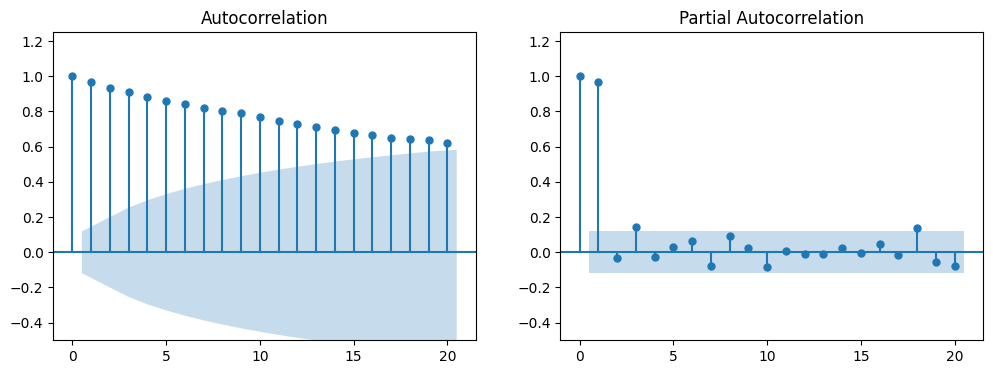

In [483]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# ACF Plot
plot_acf(demands.values, lags=20, ax=axes[0])
# PACF Plot
plot_pacf(demands.values, lags=20, ax=axes[1])

for ax in axes:
    ax.set_ylim(-0.5, 1.25)
plt.show()

In [481]:
# 1차 차분에 대한 결과
diff = 1
diff_1 = demands.diff(periods=diff).iloc[diff:]
# diff_1.values

In [474]:
from statsmodels.tsa.stattools import kpss
    
stats, p_value, nlags, critical_values = kpss(demands.values, nlags=30)
    
print(f'KPSS Stat: {stats:.5f}')
print(f'p-value: {p_value:.2f}') # p-value > 0.05 -> 정상성
print(f'Lags: {nlags}')

KPSS Stat: 0.81503
p-value: 0.01
Lags: 30


C:\Users\USER\AppData\Local\Temp\ipykernel_2084\554610093.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p_value, nlags, critical_values = kpss(demands.values, nlags=30)


### arima 모델 학습

In [478]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = ARIMA(demands.values, order=(4, 1, 4))
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.get_forecast(steps=len(test_demands))

# print(pred)
print(pred.predicted_mean)
# print(pred.conf_int(alpha=0.95))
# # print(pred.astype(int))
# print(test_demands.to_list())
# # pred.conf_int(alpha=0.95)[:,0]
# print(test_demands.index)

c:\Projects\io_ground\io_ground_venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Projects\io_ground\io_ground_venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Projects\io_ground\io_ground_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  275
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2254.506
Date:                Mon, 29 Jul 2024   AIC                           4527.012
Time:                        20:43:25   BIC                           4559.530
Sample:                             0   HQIC                          4540.064
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1322      0.111     -1.195      0.232      -0.349       0.085
ar.L2          1.2072      0.093     12.929      0.000       1.024       1.390
ar.L3         -0.2435      0.102     -2.384      0.0

### 결과 시각화

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(150).plot(ax =ax)
ax.plot(test_demands.index, pred.predicted_mean, label='Prediction')
ax.plot(test_demands.index, test_demands, label='Actual')
ax.fill_between(test_demands.index, pred.conf_int(alpha=0.90)[:,0], pred.conf_int(alpha=0.90)[:,1], color='k', alpha=0.1, label='0.95 pred Interval')
ax.legend(loc='upper left')
plt.show()

### hyperparameter 튜닝

In [ ]:
import itertools

p = range(0, 6)
d = range(1, 2)
q = range(0, 6)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    model = ARIMA(demands.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))

### 평가

In [477]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

print('MSE:', MSE(pred.predicted_mean, test_demands.to_list()))
print('MAE:', MAE(pred.predicted_mean, test_demands.to_list()))

MSE: 603894.6450896903
MAE: 749.9901872430855


### 추가 samrima, auto arima

c:\Projects\io_ground\io_ground_venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['season_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Projects\io_ground\io_ground_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[73561.15414838 73203.95484795 73454.78148426 73933.88245409
 73969.56109543 73538.2746711  73259.72122531 73508.01478944
 73911.5542395  73906.70904957]


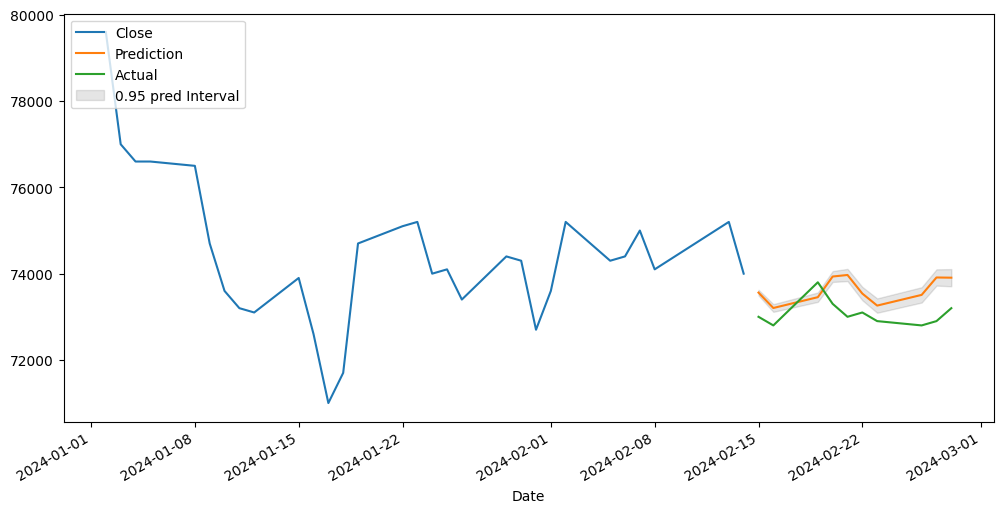

In [417]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# model = ARIMA(demands.values, order=(0, 1, 2))
model = SARIMAX(demands.values, 
                order=(2, 1, 3), 
                season_order = (1, 1, 2, 14)).fit(disp=False)
# model_fit = model.fit()
# print(model_fit.summary())

pred = model.get_forecast(steps=len(test_demands))
# pred = model_fit.predict(start=1)

# pred = auto_arima_model.predict(len(test_demands), return_conf_int=True)
# print(pred)
print(pred.predicted_mean)
# print(pred.conf_int(alpha=0.95))
# # print(pred.astype(int))
# print(test_demands.to_list())
# # pred.conf_int(alpha=0.95)[:,0]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(50).plot(ax =ax)
ax.plot(test_demands.index, pred.predicted_mean, label='Prediction')
ax.plot(test_demands.index, test_demands, label='Actual')
ax.fill_between(test_demands.index, pred.conf_int(alpha=0.95)[:,0], pred.conf_int(alpha=0.95)[:,1], color='k', alpha=0.1, label='0.95 pred Interval')
ax.legend(loc='upper left')
plt.show()

In [238]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 41.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------  2.8/2.8 MB 59.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 44.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 75.1 MB/s eta 0:00:00


In [239]:
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(demands.values, start_p=1, start_q=1, 
                             max_p=3, max_1=3, m=3, seasonal=True, # sarima(seasonal=True)
                             d=1, D=1,
                             max_P=3, max_Q=3, 
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True, 
                             stepwise=False)

 ARIMA(0,1,0)(0,1,0)[3]             : AIC=8772.288, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[3]             : AIC=8681.081, Time=0.97 sec
 ARIMA(0,1,0)(0,1,2)[3]             : AIC=8662.806, Time=1.83 sec
 ARIMA(0,1,0)(0,1,3)[3]             : AIC=8664.668, Time=2.49 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=8716.247, Time=0.26 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=8664.349, Time=1.53 sec
 ARIMA(0,1,0)(1,1,2)[3]             : AIC=8664.496, Time=3.00 sec
 ARIMA(0,1,0)(1,1,3)[3]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=8683.862, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=8665.669, Time=1.55 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=8668.173, Time=3.28 sec
 ARIMA(0,1,0)(2,1,3)[3]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,0)(3,1,0)[3]             : AIC=8668.480, Time=1.30 sec
 ARIMA(0,1,0)(3,1,1)[3]             : AIC=inf, Time=3.21 sec
 ARIMA(0,1,0)(3,1,2)[3]             : AIC=inf, Time=4.40 sec
 ARIMA(0,1,1)(0,1,0)[3]       